In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_excel('credit-data-training.xlsx')
df.head(10)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker,Credit-Application-Result
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2,Creditworthy
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2,Creditworthy
2,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1,Creditworthy
3,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1,Creditworthy
4,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1,Creditworthy
5,Some Balance,6,No Problems (in this bank),Home Related,362,< £100,< 1yr,4,None,NaN,3,52.0,Other Banks/Depts,2,More than 1,1,1,1,1,Creditworthy
6,No Account,6,Some Problems,Home Related,433,£100-£1000,< 1yr,4,None,NaN,2,24.0,Other Banks/Depts,1,1,1,2,1,1,Non-Creditworthy
7,No Account,6,Paid Up,Home Related,454,None,< 1yr,3,None,NaN,2,22.0,Other Banks/Depts,2,1,1,1,1,1,Creditworthy
8,No Account,6,Paid Up,Home Related,484,None,1-4 yrs,3,Yes,3.0,1,28.0,Other Banks/Depts,2,1,1,1,1,1,Creditworthy
9,Some Balance,6,Paid Up,Home Related,660,£100-£1000,1-4 yrs,2,None,4.0,1,23.0,Other Banks/Depts,1,1,1,1,1,1,Creditworthy


In [164]:
df.isna().sum()

Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
Credit-Application-Result              0
dtype: int64

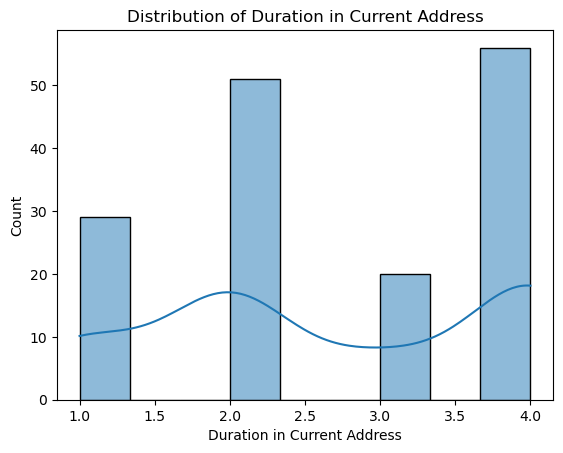

In [165]:
sns.histplot(data=df, x='Duration-in-Current-address', kde=True)

plt.xlabel('Duration in Current Address')
plt.ylabel('Count')
plt.title('Distribution of Duration in Current Address')
plt.show()


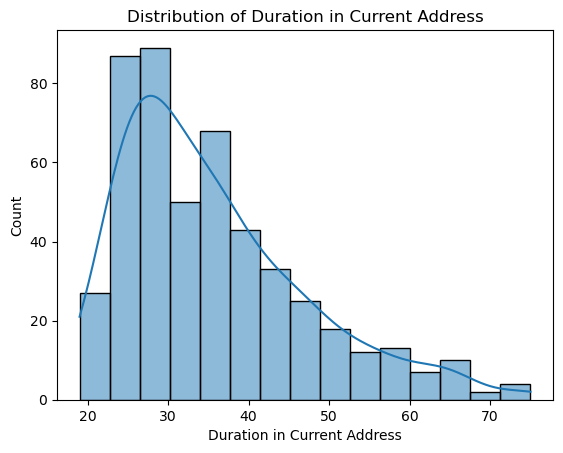

In [166]:
sns.histplot(data=df, x='Age-years', kde=True)

plt.xlabel('Duration in Current Address')
plt.ylabel('Count')
plt.title('Distribution of Duration in Current Address')
plt.show()

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account-Balance                    500 non-null    object 
 1   Duration-of-Credit-Month           500 non-null    int64  
 2   Payment-Status-of-Previous-Credit  500 non-null    object 
 3   Purpose                            500 non-null    object 
 4   Credit-Amount                      500 non-null    int64  
 5   Value-Savings-Stocks               500 non-null    object 
 6   Length-of-current-employment       500 non-null    object 
 7   Instalment-per-cent                500 non-null    int64  
 8   Guarantors                         500 non-null    object 
 9   Duration-in-Current-address        156 non-null    float64
 10  Most-valuable-available-asset      500 non-null    int64  
 11  Age-years                          488 non-null    float64

In [168]:
df['Length-of-current-employment'] = df['Length-of-current-employment'].replace(['< 1yr','4-7 yrs','1-4 yrs'],[0,1,2])
df['Value-Savings-Stocks'] = df['Value-Savings-Stocks'].replace(['None','< £100','£100-£1000'],[0,1,2])
df['Guarantors'] = df['Guarantors'].replace(['None','Yes'],[0,1])
df['Duration-in-Current-address'].fillna(df['Duration-in-Current-address'].mode()[0], inplace=True)
df['Age-years'].fillna(df['Age-years'].median(), inplace=True)
df['No-of-Credits-at-this-Bank'] = df['No-of-Credits-at-this-Bank'].replace(['1','More than 1'],[0,1])

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Account-Balance                    500 non-null    object 
 1   Duration-of-Credit-Month           500 non-null    int64  
 2   Payment-Status-of-Previous-Credit  500 non-null    object 
 3   Purpose                            500 non-null    object 
 4   Credit-Amount                      500 non-null    int64  
 5   Value-Savings-Stocks               500 non-null    int64  
 6   Length-of-current-employment       500 non-null    int64  
 7   Instalment-per-cent                500 non-null    int64  
 8   Guarantors                         500 non-null    int64  
 9   Duration-in-Current-address        500 non-null    float64
 10  Most-valuable-available-asset      500 non-null    int64  
 11  Age-years                          500 non-null    float64

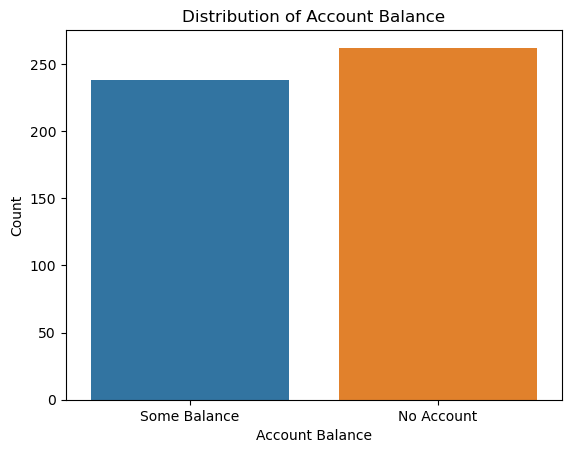

In [170]:
sns.countplot(data=df, x='Account-Balance')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Account Balance')
plt.show()

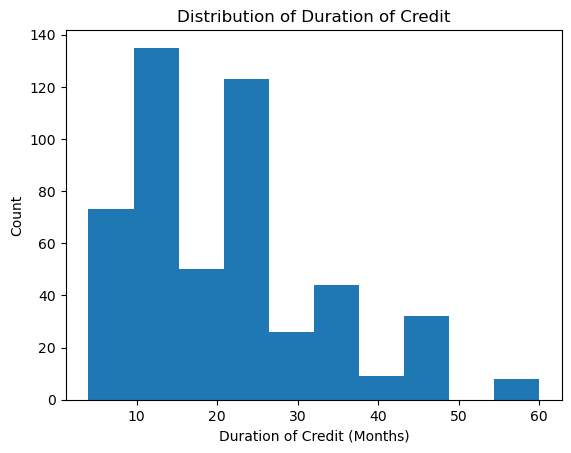

In [171]:
plt.hist(df['Duration-of-Credit-Month'], bins=10)
plt.xlabel('Duration of Credit (Months)')
plt.ylabel('Count')
plt.title('Distribution of Duration of Credit')
plt.show()

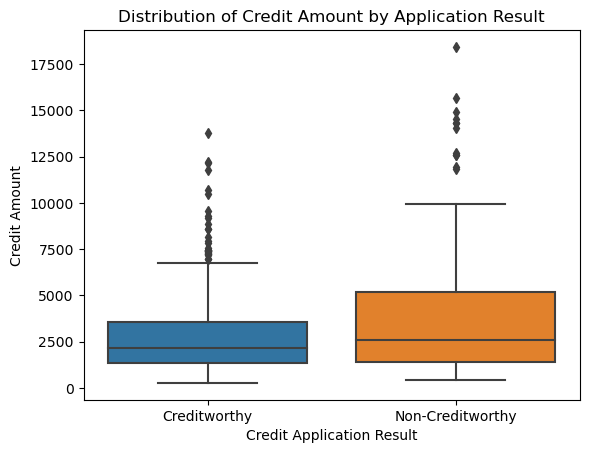

In [172]:
sns.boxplot(data=df, x='Credit-Application-Result', y='Credit-Amount')
plt.xlabel('Credit Application Result')
plt.ylabel('Credit Amount')
plt.title('Distribution of Credit Amount by Application Result')
plt.show()

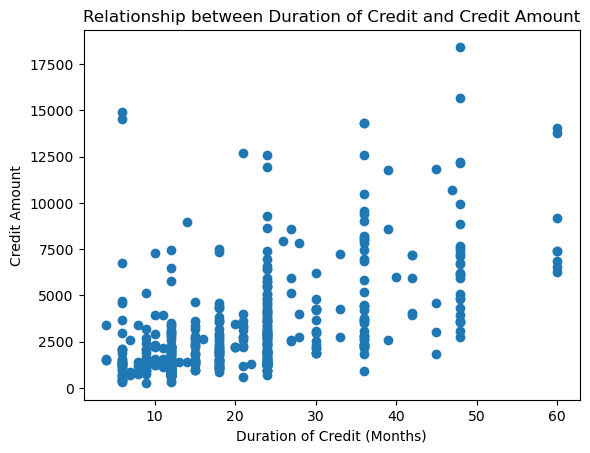

In [173]:
plt.scatter(df['Duration-of-Credit-Month'], df['Credit-Amount'])
plt.xlabel('Duration of Credit (Months)')
plt.ylabel('Credit Amount')
plt.title('Relationship between Duration of Credit and Credit Amount')
plt.show()

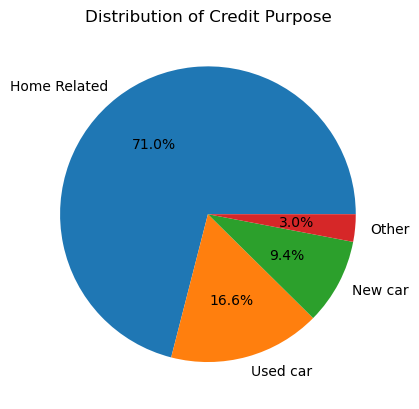

In [174]:
purpose_counts = df['Purpose'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Credit Purpose')
plt.show()

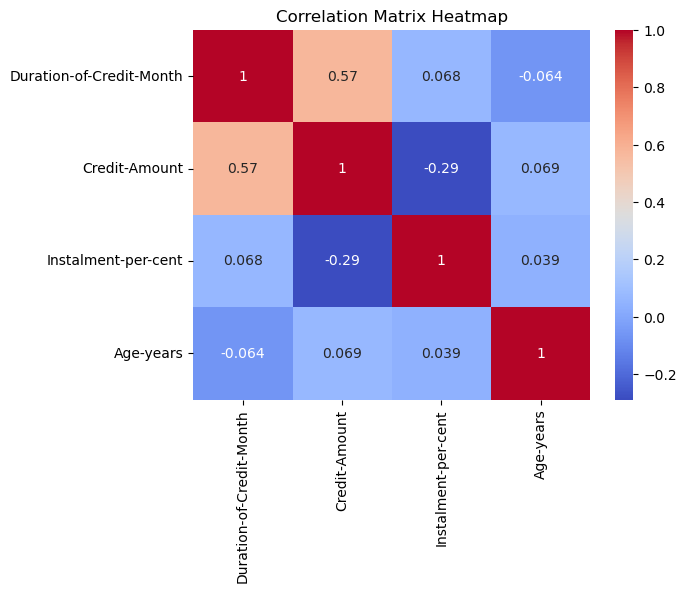

In [175]:
numerical_columns = ['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent', 'Age-years']
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import accuracy_score, roc_auc_score

In [177]:
df

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker,Credit-Application-Result
0,Some Balance,4,Paid Up,Other,1494,2,0,1,0,2.0,1,33.0,Other Banks/Depts,2,0,1,2,1,2,Creditworthy
1,Some Balance,4,Paid Up,Home Related,1494,2,0,1,0,2.0,1,29.0,Other Banks/Depts,2,0,1,2,1,2,Creditworthy
2,Some Balance,4,No Problems (in this bank),Home Related,1544,0,2,2,0,1.0,1,42.0,Other Banks/Depts,2,1,1,2,1,1,Creditworthy
3,Some Balance,4,No Problems (in this bank),Home Related,3380,0,2,1,0,1.0,1,37.0,Other Banks/Depts,2,0,1,2,1,1,Creditworthy
4,No Account,6,Paid Up,Home Related,343,0,0,4,0,1.0,1,27.0,Other Banks/Depts,2,0,1,1,1,1,Creditworthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,No Account,60,No Problems (in this bank),Other,7418,2,0,1,0,1.0,1,33.0,Other Banks/Depts,2,0,1,1,1,1,Creditworthy
496,No Account,60,No Problems (in this bank),Home Related,7418,2,0,1,0,1.0,1,27.0,Other Banks/Depts,2,0,1,1,1,1,Creditworthy
497,No Account,60,No Problems (in this bank),Home Related,9157,2,0,2,0,4.0,4,27.0,Other Banks/Depts,3,0,1,1,1,1,Creditworthy
498,Some Balance,60,No Problems (in this bank),Home Related,13756,2,1,2,0,4.0,4,63.0,Other Banks/Depts,3,0,1,1,2,1,Creditworthy


In [178]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes==object:
        df[i] = le.fit_transform(df[i])

In [179]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [181]:
clf = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss')
clf.fit(x_train, y_train, verbose=100)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

0:	learn: 0.6440532	total: 13.6ms	remaining: 13.5s
100:	learn: 0.1221107	total: 500ms	remaining: 4.45s
200:	learn: 0.0470636	total: 891ms	remaining: 3.54s
300:	learn: 0.0254007	total: 1.24s	remaining: 2.88s
400:	learn: 0.0166487	total: 1.58s	remaining: 2.36s
500:	learn: 0.0115510	total: 1.93s	remaining: 1.92s
600:	learn: 0.0092872	total: 2.28s	remaining: 1.51s
700:	learn: 0.0074785	total: 2.63s	remaining: 1.12s
800:	learn: 0.0063388	total: 2.98s	remaining: 741ms
900:	learn: 0.0056287	total: 3.33s	remaining: 366ms
999:	learn: 0.0049607	total: 3.67s	remaining: 0us
Accuracy: 0.78
ROC AUC: 0.7658730158730159
